# INFO4301 - Apprentissage machine TP1 - Alex Savoie

## 1. Régression linéaire multivariée 

### Importer les librairies

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Importer le fichier data1.csv
Data1.csv est placé sous forme d'un tableau et on affiche les 5 premières données

In [315]:
data = pd.read_csv("data1.csv", header=None)
data.head()

,0,1,2
0,2167,4,453900
1,1663,4,383900
2,2463,4,423000
3,1479,3,286000
4,3063,5,593900


### Normalisation des caractéristiques
Puisque l'écart entre les valeurs des caractéristiques dans la colonnes 0 et 1 sont très différent (caractéristique 0 à des valeurs dans les milliers alors que caractéristique 1 varie dans des valeurs à un seul chiffre) , nous appliquons la normalisation sur nos valeurs.

In [316]:
data = normalize(data, axis=0)

### Separation de nos données X et Y
Les données des caractéristiques seront placés dans la même matrice nommé X alors que les données de Y iront dans une matrice nommé Y. Par la suite, on affiche ces matrices (avec leurs nouvelles valeurs normalisées).

In [317]:
X=data[:, 0:2]  #Les deux premieres colonnes = X
Y=data[:, 2:]   #La derniere colonnes = Y

In [318]:
print(X)
print(Y)

[[0.14313253 0.13768568]
 [0.10984283 0.13768568]
 [0.16268363 0.13768568]
 [0.09768944 0.10326426]
 [0.20231424 0.1721071 ]
 [0.13527246 0.1721071 ]
 [0.10548346 0.13768568]
 [0.098416   0.13768568]
 [0.0953116  0.13768568]
 [0.10284142 0.13768568]
 [0.13230017 0.1721071 ]
 [0.13626323 0.13768568]
 [0.12899762 0.13768568]
 [0.29993763 0.20652852]
 [0.08791389 0.13768568]
 [0.15607853 0.1721071 ]
 [0.09134854 0.10326426]
 [0.08580026 0.13768568]
 [0.17648829 0.1721071 ]
 [0.20436182 0.1721071 ]
 [0.12087334 0.13768568]
 [0.12886552 0.10326426]
 [0.11010703 0.13768568]
 [0.13375329 0.1721071 ]
 [0.26109963 0.13768568]
 [0.07681732 0.13768568]
 [0.10046358 0.13768568]
 [0.17100606 0.13768568]
 [0.14947343 0.13768568]
 [0.17833772 0.13768568]
 [0.12562902 0.10326426]
 [0.07021222 0.06884284]
 [0.13890527 0.1721071 ]
 [0.21136322 0.13768568]
 [0.12377959 0.1721071 ]
 [0.09907651 0.13768568]
 [0.08599841 0.13768568]
 [0.14498196 0.1721071 ]
 [0.28256621 0.1721071 ]
 [0.14696349 0.1721071 ]


### Graphe permettant de visualiser les données
À l'aide de la librairie matplotlib.pyplot, on afficher un graphe à trois dimensions avec nos valeurs normalisées.

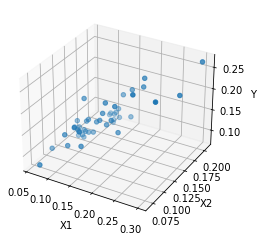

In [319]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

### Initialisation des thétas
Pour chaque taux d'apprentissage, des matrices verticales contenant tous nos thétas est initalisé avec des 0 . Chaque matrice sera utilisé plus tard pour le training avec différentes taux d'apprentissage.

In [344]:
theta3 = np.zeros((data.shape[1], 1))
theta1 = np.zeros((data.shape[1], 1))
theta03 = np.zeros((data.shape[1], 1))
theta01 = np.zeros((data.shape[1], 1))
theta003 = np.zeros((data.shape[1], 1))
theta001 = np.zeros((data.shape[1], 1))
thetaBest = np.zeros((data.shape[1], 1))

theta3

array([[0.],
       [0.],
       [0.]])

### Fonction du calcul de l'hypothèse
Cette fonction calcule l'hypothèse. La valeur retourné est la multiplication entre la matrice des thétas et la matrice X

In [321]:
def calculHypothese (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1)) #Création d'une matrice temporaire X initialisé avec des 1
  tempX[:,1:] = X
  return np.matmul(tempX, theta)  #On retourne le produit entre la matrice tempX et théta

### Fonction du coût
Fonction de coût qui calcule la différence entre les valeurs estimé avec l'hypothèse et la valeur réel.  Cette fonction sera utile plus tard dans la fonction descenteGradient.

In [322]:
def fonctionDeCout (theta, X, Y) :
  return np.average(np.square(Y - calculHypothese(theta, X))) / 2

### Fonction gradient
Fonction qui calcule le gradient à un moment précis (En d'autre mots, celle-ci calcule la dérivée). Cette fonction sera utile plus tard dans la fonction descenteGradient.

In [323]:
def gradient(theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - calculHypothese(theta, X)) * tempX, axis= 0) #Fonction dérivée de l'hypothèse
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Fonction de la descente de gradient
Cette fonction calcule la descente de gradient

In [324]:
def descenteGradient(theta, X, Y, tauxApprentissage, iteration) :
  cost = np.zeros(iteration)  #Matrice de dimensions iteration initié à zero
  for i in range(iteration) :
    d_theta = gradient (theta, X, Y) #Calcul de la dérivée des thétas
    theta = theta - tauxApprentissage * d_theta #Ajustement des thétas après le calcul de leur dérivée
    cost[i] = fonctionDeCout(theta, X, Y) #Le cout est ajouté à la matrice cost
    if ((i+1) % 10 == 0) or i == 0 :  #Print le cout à chaque 10 itérations
        print ('Iteration : ', i+1, ' Cout : ', fonctionDeCout(theta, X, Y)) 
  return theta, cost

## Training
Dans cet exemple, toutes les données sont utilisées pour le training. On fait plusieurs training avec des taux d'apprentissage différents. Chaque training comporte un total de 50 itérations.

### Taux apprentissage = 0,3

In [325]:
theta3, cost3 = descenteGradient(theta3, X, Y, 0.3, 50)

Iteration :  1  Cout :  0.00551581927338363
Iteration :  10  Cout :  0.0009031265185231994
Iteration :  20  Cout :  0.0008869653599745398
Iteration :  30  Cout :  0.0008765068343652517
Iteration :  40  Cout :  0.000866228617724652
Iteration :  50  Cout :  0.0008561245604589772


### Taux apprentissage = 0,1

In [326]:
theta1, cost1 = descenteGradient(theta1, X, Y, 0.1, 50)

Iteration :  1  Cout :  0.008720621411776725
Iteration :  10  Cout :  0.0019886439585589575
Iteration :  20  Cout :  0.0010219207020914747
Iteration :  30  Cout :  0.0009110500855414064
Iteration :  40  Cout :  0.0008955346292884653
Iteration :  50  Cout :  0.0008906591682455098


### Taux apprentissage = 0,03

In [327]:
theta03, cost03 = descenteGradient(theta03, X, Y, 0.03, 50)

Iteration :  1  Cout :  0.010040925656775614
Iteration :  10  Cout :  0.0060713134892916845
Iteration :  20  Cout :  0.003646946385004034
Iteration :  30  Cout :  0.0023597417069363418
Iteration :  40  Cout :  0.0016760695719432318
Iteration :  50  Cout :  0.001312714028391695


### Taux apprentissage = 0,01

In [328]:
theta01, cost01 = descenteGradient(theta01, X, Y, 0.01, 50)

Iteration :  1  Cout :  0.010437071964543042
Iteration :  10  Cout :  0.008803285162269612
Iteration :  20  Cout :  0.007314210889652219
Iteration :  30  Cout :  0.006105845550714916
Iteration :  40  Cout :  0.0051252592020452565
Iteration :  50  Cout :  0.004329502277145635


### Taux apprentissage = 0,003

In [329]:
theta003, cost003 = descenteGradient(theta003, X, Y, 0.003, 50)

Iteration :  1  Cout :  0.010577709407227253
Iteration :  10  Cout :  0.010049106326026097
Iteration :  20  Cout :  0.009495580000404244
Iteration :  30  Cout :  0.008975559594064887
Iteration :  40  Cout :  0.00848701653758037
Iteration :  50  Cout :  0.008028045078514371


### Taux apprentissage = 0,001

In [330]:
theta001, cost001 = descenteGradient(theta001, X, Y, 0.001, 50)

Iteration :  1  Cout :  0.010618080698943277
Iteration :  10  Cout :  0.01043800539453662
Iteration :  20  Cout :  0.010241834502013377
Iteration :  30  Cout :  0.010049700366162146
Iteration :  40  Cout :  0.009861519904279383
Iteration :  50  Cout :  0.009677211743633141


### Résultats
Selon les résultats obtenus, la descente de gradient avec le taux d'apprentissage égale à 0,3 nous donne le coût minimal après 50 itérations. Donc, nous utiliserons ce taux mais cette fois, avec 1500 itérations pour trouver un coût encore plus optimal.

In [331]:
thetaBest, costBest = descenteGradient(thetaBest, X, Y, 0.3, 1500)

Iteration :  1  Cout :  0.00551581927338363
Iteration :  10  Cout :  0.0009031265185231994
Iteration :  20  Cout :  0.0008869653599745398
Iteration :  30  Cout :  0.0008765068343652517
Iteration :  40  Cout :  0.000866228617724652
Iteration :  50  Cout :  0.0008561245604589772
Iteration :  60  Cout :  0.0008461916986087553
Iteration :  70  Cout :  0.0008364271204061828
Iteration :  80  Cout :  0.000826827963637182
Iteration :  90  Cout :  0.000817391414797025
Iteration :  100  Cout :  0.000808114708261326
Iteration :  110  Cout :  0.0007989951254711408
Iteration :  120  Cout :  0.0007900299941319341
Iteration :  130  Cout :  0.0007812166874261863
Iteration :  140  Cout :  0.0007725526232393953
Iteration :  150  Cout :  0.0007640352633992537
Iteration :  160  Cout :  0.0007556621129277762
Iteration :  170  Cout :  0.0007474307193061542
Iteration :  180  Cout :  0.0007393386717521224
Iteration :  190  Cout :  0.0007313836005096253
Iteration :  200  Cout :  0.0007235631761505714
Iteration

### Meilleur paramètres thétas (θi).

In [332]:
thetaBest

array([[0.05716965],
       [0.48858727],
       [0.1079189 ]])

### Visualiser les résultats

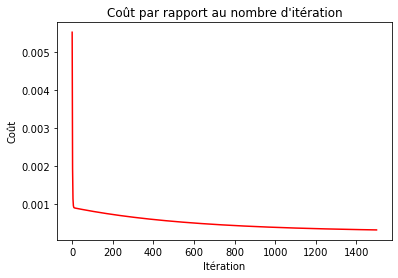

In [333]:

fig, ax = plt.subplots()  
ax.plot(np.arange(1500), costBest, 'r')  
ax.set_xlabel('Itération')  
ax.set_ylabel('Coût')  
ax.set_title("Coût par rapport au nombre d'itération")  

plt.show()

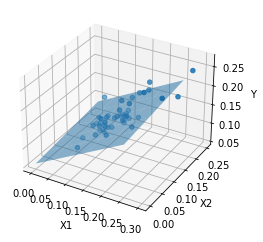

In [334]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([calculHypothese(thetaBest, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.5)
    
plt.show()

# 2. Régression avancée

### Importer les données train
Les données servant comme training seront placés dans des matrices nommées X_train et y_train

In [335]:
forestDataTrain = pd.read_csv("data2_train.csv")
forestDataTrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,8,6,3,5,88.2,28.2,96.3,6.1,9.2,53,7.2,0.0,0.0
1,8,5,10,2,92.6,37.4,671.1,7.7,19.0,35,1.4,0.0,0.0
2,8,5,10,6,92.6,45.7,688.9,7.7,15.6,35,1.8,0.0,0.0
3,9,7,3,5,93.7,35.3,79.5,10.0,9.3,99,4.5,0.2,0.0
4,9,7,3,7,91.3,53.3,104.2,10.6,12.4,101,2.3,0.0,0.0


In [336]:
X_train = forestDataTrain.iloc[:, 0:12].values
y_train = forestDataTrain.iloc[:, 12].values

### Importer les données test
On fait du même pour les données test

In [337]:
forestDataTest = pd.read_csv("data2_test.csv")
forestDataTest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,8,6,9,6,94.5,90.0,700.6,8.1,23.8,42,4.5,0.0,0.00
1,7,6,9,3,94.9,135.3,701.6,10.2,27.4,23,5.0,0.0,0.00
2,5,5,9,3,92.1,84.9,737.7,7.2,13.9,76,5.4,0.0,0.00
3,3,3,9,5,94.4,119.9,670.0,13.2,24.0,39,5.0,0.0,0.00
4,8,5,3,1,92.1,41.7,88.6,7.2,17.1,31,3.6,0.0,1.75


In [338]:
X_test = forestDataTest.iloc[:, 0:12].values
y_test = forestDataTest.iloc[:, 12].values

### Fonction cout
Fonction qui nous permettera de calculer le cout de chaque type de regressio. Cela sera fait en calculant la somme des différence, au carrée, entre les valeurs estimé à partir nos régression et les vraies valeurs y_test. Tout cela est divisé pas 1/2m, où m est le nombre de données utilisées.

In [339]:
def cout(x,y, numberOfData):
    return sum(np.sqrt((x-y)**2))/(2*numberOfData)

### Training (Random Forest Regressor)
Par défault, cela va créer une forêt à partir de 100 arbres.

In [340]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train);
y_pred = rf.predict(X_test) #Estimation à partir des valeurs X_test selon notre Random Forest Regressor

In [341]:
cout(y_pred, y_test, len(forestDataTest.index))

13.753320535714286

### Training (Extra Trees Regressor)
Par défault, cela va créer une forêt à partir de 100 arbres.

In [342]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()

et.fit(X_train, y_train);
y_pred2 = et.predict(X_test) #Estimation à partir des valeurs X_test selon notre Random Forest Regressor

In [343]:
cout(y_pred2, y_test, len(forestDataTest.index))

20.220478749999998

### Resultats
On s'apercoit que le cout obtenu par le Random Forest Regressor est inférieur qu'au cout obtenu par l'algorithme du Extra Trees Regressor, avec les paramètres par défaults. Donc, avec une forêt contenant 100 arbres, le Random Forest Regressor nous donnes un meilleur modèle pour effectuer des estimations plus précises. Il serait interessant de regarder le comportement de ces deux types de regression en modifiant certains de leur paramètre, comme changer le nombre d'arbres dans une forêt.